<a href="https://colab.research.google.com/github/aha03/Oscilloscope/blob/master/ML_TP1_Exer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Exercise 1 - Linear Regression

To help you start with Python and NumPy, there is a great tutorial online,
created at Stanford. It can be downloaded as a notebook at https://github.com/kuleshov/cs228-material/tree/master/tutorials/python. Note that this tutorial is written in Python 2.7.


<font color='red'> PLEASE DO NOT HESITATE to include your remarks/comments (in colors of your choice) in the notebook. That will be considered as a short report.</font>

In [140]:
# Change here using your first and last names
fn1 = "peiru"
ln1 = "li"
fn2 = "adam"
ln2 = "benomar"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp1", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

tp1_li_peiru_and_benomar_adam.ipynb


## Part 1: Linear regression with one variable

You will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

# Importe some libraries and examine the data.

In [141]:
# Download the data
!wget https://www.dropbox.com/s/us61lvxcjnn1n3j/ex1data1.txt?dl=0 \
   -O ex1data1.txt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

--2021-03-01 10:37:22--  https://www.dropbox.com/s/us61lvxcjnn1n3j/ex1data1.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/us61lvxcjnn1n3j/ex1data1.txt [following]
--2021-03-01 10:37:22--  https://www.dropbox.com/s/raw/us61lvxcjnn1n3j/ex1data1.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce460cff961346ddcb52295dc50.dl.dropboxusercontent.com/cd/0/inline/BJ1EZnNwlvvLGExAcvO9gnj7J1pjeym7fI0b_xONzX2KnMJSxuzuIJPJbyXqeggrekrzvzklwciAUmL0mOyHxuOIZIyDFrPVAK8LiMV7jOq1ww/file# [following]
--2021-03-01 10:37:22--  https://uce460cff961346ddcb52295dc50.dl.dropboxusercontent.com/cd/0/inline/BJ1EZnNwlvvLGExAcvO9gnj7J1pjeym7fI0b_xONzX2KnMJSxuzuIJPJbyXqeggrekrzvzklwciAUmL0mOyHxuOIZIyDFrPVAK8LiMV7jOq1ww/file
Resolving u

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [142]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


#Plot it to get a better idea of what the data looks like.

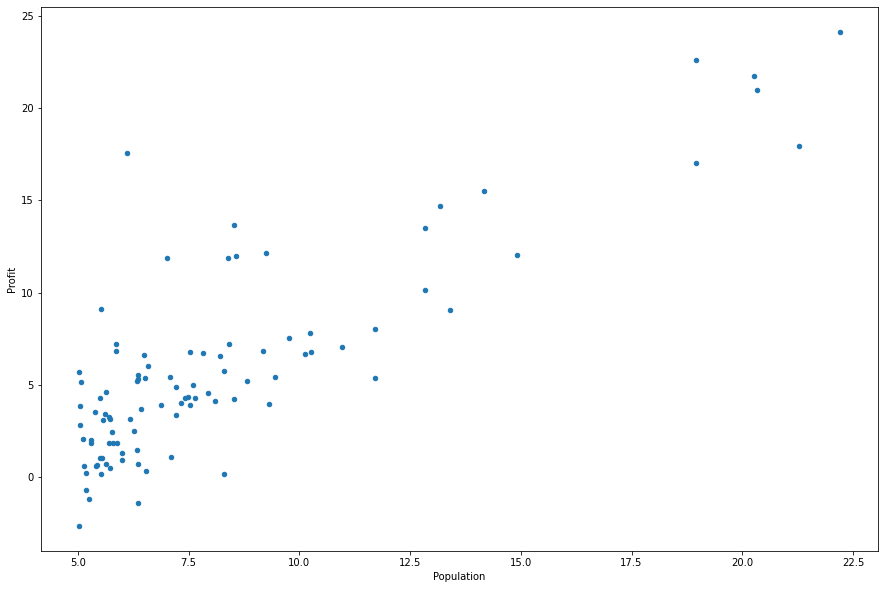

In [143]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(15,10))

#data.T.plot.scatter(x = 'Population', y = 'Profit')

#Goal: fit the linear regression parameters $\mathbf{w}$ to your dataset using gradient descent. 

In [144]:
data.count()

Population    97
Profit        97
dtype: int64

You suppose that your relation between your data $x$ and target $t$ can be modeled by a linear mode 

$y(x,\mathbf{w})= w_0+w_1x$ \\
The objective of linear regression is to minimize the cost function:

$E(\mathbf{w})=\displaystyle \frac{1}{2N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}^2 $ \\



$N$ is the number of samples in the data set.


<font color='red'> Question: in this dataset, $N=97$ </font> 



Your model parameters are the $w_j$ values which you will adjust to minimize cost $E(\mathbf{w})$. 
One solution is the batch gradient descent algorithm. In batch gradient descent,each iteration performs the update:

$\mathbf{w}=\displaystyle \mathbf{w} - \eta \frac{1}{N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}x_n$

With each step of gradient descent, your parameters $w_j$ come closer to the optimal values that will achieve the lowest cost $E(\mathbf{w})$.

<font color='red'> Question: how many parameters $w$ do you have to find for this dataset. </font> 

<font color='blue'> Reponse: On a besoin de 2 $W$ ($w_1$,$w_0$). </font>
 

<font color='red'>TODO: Create a function to compute the cost of a given solution (characterized by the parameters w). </font> 
Functions like power, sum of numpy may be useful.

#Important notes for implementation in Numpy

For array, * means element-wise multiplication, and the dot() function is used for matrix multiplication.


For matrix, * means matrix multiplication, and the multiply() function is used for element-wise multiplication.


<font color='red'> Maybe in this part (Linear Regression), you should learn to use np.array. In part 2 (Logistic Regression), you learn to use np.matrix </font> 

In [145]:
def computeCost(X, t, w):
    #X : input dataset of shape (N x D+1), N: number of examples, D: the number of features. 
    
    #t : target of shape (N, ).
    
    #w : parameters of shape (D+1, ).
    
    # Note that if you use np.array, * is elementwise multiplication, unlike Matlab,
    # you may need to use it 
    # then using np.sum...

    # you can use np.dot
    # WRITE YOU CODE HERE
    tmp = np.power(np.dot(X,w)-t, 2)

    # In this dataset, X is Population (each data point has only one variable, one feature)
    # t is profit 
    # but for coding this function, you should consider that X is a np.array... 
    # (array in numpy may have more than one dimension) 
    ...
    return sum(tmp)/(2 * len(X))


#Do some data preparation.

<font color='red'>TODO: get X (training data) (first column) and t (target variable) (last column) from "data". </font>

In [146]:
# set X (training data) and t (target variable)
cols = data.shape[1]
X = data.iloc[:,0:1]
t = data.iloc[:,1:2]   ##### COMPLETE YOUR CODE HERE#####

Take a look to make sure X (training set) and t (target variable) look correct.

In [147]:
X.head()

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [148]:
t.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Let's add a column of ones to the X so we can use a vectorized solution to computing the cost and gradients (use X.insert).

<font color='red'>Question: why do you need to do this? (hint: related to $w_0$)</font>

<font color='blue'> Reponse: Parce que $W$ est un vecteur ($w_0$,$w_1$), et plus on fait la multiplication entre $W$ et $X$, c'est a dire $y(x,\mathbf{w})= w_0*1+w_1*x$, alors il nous faut ajouter une colone de $'1'$ </font>

In [149]:
X.insert(0,'Ones',1)
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


The cost function is expecting numpy array (or matrices) so we need to convert X and t before we can use w (use np.array or np.matrix ...). We also need to initialize w (np.zeros). 

<font color='red'> Question: explain the shape of w?</font>

<font color='blue'> Reponse: Parce que l'on veut trouver la regression lineaire, alors on doit trouver le coefficient directeur $w_1$ et l'ordonnee a l'origine $w_0$.</front>

In [150]:
X = np.array(X.values)
t = np.array(t.values)  ##### COMPLETE YOUR CODE HERE#####
w = np.zeros((2,1))   ##### COMPLETE YOUR CODE HERE#####

Let's take a quick look at the shape of our X,t,w.

In [151]:
X.shape, w.shape, t.shape

((97, 2), (2, 1), (97, 1))

Now let's compute the cost for our initial solution (0 values for w).

In [152]:
computeCost(X, t, w)

array([32.07273388])

Expected result 32.072733877455676. So far so good. 

#<font color='red'>Exercise: Define a function to perform gradient descent on the parameters w using the update rules defined in the text.</font>





Functions like multiply, sum of numpy may be useful.

In [153]:
def gradientDescent(X, t, w, eta, iters):
    # Initialize some useful values
    N=len(X);                    # number of training examples
    cost = np.zeros(iters);  

    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    w = w.copy()
    
    for i in range(iters):
        ##### WRITE YOUR CODE HERE#####
        diff = np.dot(X,w) - t;
        deriv = np.dot(X.T,diff);
        w = w - (eta/N) * deriv;##### COMPLETE YOUR CODE HERE#####

        cost[i] = computeCost(X, t, w) # you should stock the cost function for each epoch
                                    # this is useful for checking whether the cost reduces...
    return w, cost

Initialize some additional variables - the learning rate eta, and the number of iterations to perform.

In [154]:
eta = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters eta to the training set.

In [155]:
w, cost = gradientDescent(X, t, w, eta, iters)
w

array([[-3.24140214],
       [ 1.1272942 ]])

Expected result: matrix([[-3.24140214,  1.1272942 ]]).

Finally you can compute the cost (error) of the trained model using our fitted parameters.

In [159]:
computeCost(X, t, w)

array([4.5159555])

Expected result: 4.515955503078912.

Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

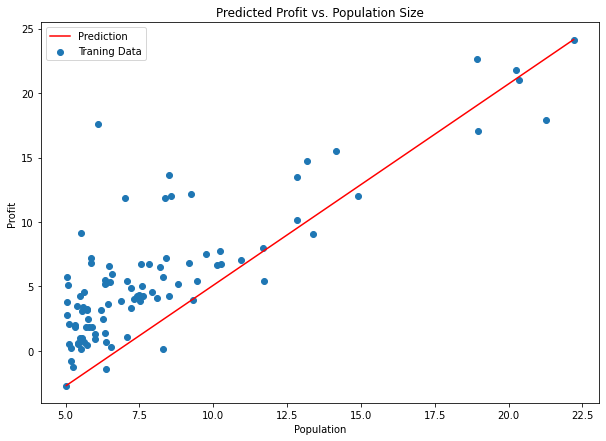

In [158]:
#TODO: to complete
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = np.linspace(data.Profit.min(), data.Profit.max(), 100) ##### COMPLETE YOUR CODE HERE#####

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

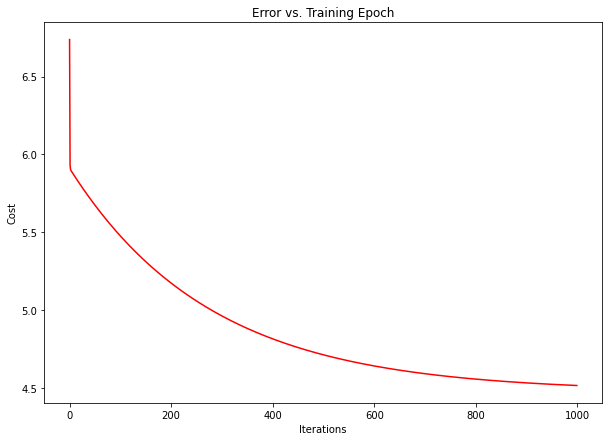

In [164]:
#TODO: plot the error vs. training epoch
fig, ax = plt.subplots(figsize=(10,7))

##### COMPLETE YOUR CODE HERE#####
ax.plot(np.arange(iters), cost, 'r') #use np.arange(iters) to create an array ...
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')


## Part 2: Linear regression with multiple variables

This exercise also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house).  Let's use the techniques we already applied to analyze that data set as well.

In [160]:
!wget https://www.dropbox.com/s/5b5hnnnn8d4y2o5/ex1data2.txt?dl=0 \
   -O ex1data2.txt



--2021-03-01 10:54:32--  https://www.dropbox.com/s/5b5hnnnn8d4y2o5/ex1data2.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5b5hnnnn8d4y2o5/ex1data2.txt [following]
--2021-03-01 10:54:33--  https://www.dropbox.com/s/raw/5b5hnnnn8d4y2o5/ex1data2.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucabdde342067e42cd53dd2b9062.dl.dropboxusercontent.com/cd/0/inline/BJ3U_V53ZrBNlGBcZQKXoF0Dta0nYUhjhdEz5fHvsudwhJrALOEX_R9hprgKY0HFfIwRKKJHHb0D9SbVCFuPEkfRJkL83awEgsITLbcL2G9eGg/file# [following]
--2021-03-01 10:54:33--  https://ucabdde342067e42cd53dd2b9062.dl.dropboxusercontent.com/cd/0/inline/BJ3U_V53ZrBNlGBcZQKXoF0Dta0nYUhjhdEz5fHvsudwhJrALOEX_R9hprgKY0HFfIwRKKJHHb0D9SbVCFuPEkfRJkL83awEgsITLbcL2G9eGg/file
Resolving u

The notebook will start by loading and displaying some values from this dataset. 

You then complete the code to:

	- Subtract the mean value of each feature from the dataset. 
	
	- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.” 

In [161]:
file = 'ex1data2.txt'
data2 = pd.read_csv(file, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


<font color='red'>Exercise: add another pre-processing step - normalizing the features. </font>

<font color='red'>Question: why is it necessary?  </font>


	

In [162]:
##TODO, normalize your features
data2 = ...##### COMPLETE YOUR CODE HERE#####


#Now show the normalized data
data2.head()

AttributeError: ignored

Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [ ]:
eta=0.01

# add ones column
data2.insert... ##### COMPLETE YOUR CODE HERE#####

# set X (training data) and t (target variable)
cols = data2.shape[1]
X2 = data2.iloc...##### COMPLETE YOUR CODE HERE#####
t2 = ...##### COMPLETE YOUR CODE HERE#####

# convert to matrices/array
X2 = ....##### COMPLETE YOUR CODE HERE#####
t2 = ....##### COMPLETE YOUR CODE HERE#####

# initialize w
# TODO: what is shape of w? why?
# ..........................
w2 = ....##### COMPLETE YOUR CODE HERE#####

# perform linear regression on the data set
w2, cost2 = gradientDescent(X2, t2, w2, eta, iters)

# get the cost (error) of the model
computeCost(X2, t2, w2)

We can take a quick look at the training progess for this one as well.

In [ ]:
#TODO: plot the error vs. training epoch
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

<font color='red'>Question: What can you see from this figure ?</font>

Answer: ....



<font color='red'>Exercise: Try out different learning rates for the dataset and find a learning rate that converges quickly.</font>

In [ ]:
###WRITE YOUR CODE HERE
....

Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply scikit-learn's linear regressio algorithm to the data from part 1 and see what it comes up with.

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, t)

Here's what the scikit-learn model's predictions look like.

In [ ]:
x = np.array(X[:, 1])
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

You can submit now your code via Moodle.
Do not forget to answer the questions!!!